In [1]:
import pandas as pd
import ast
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
sd = dataset['train'].to_pandas()

sd['job_posted_date'] = pd.to_datetime(sd['job_posted_date'])
sd['job_skills'] = sd['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
sd_in = sd[(sd['job_country']== 'India')].dropna(subset=['salary_year_avg'])

In [4]:
job_titles = sd_in['job_title_short'].value_counts().index[:6].tolist()
job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Software Engineer']

In [5]:
sd_in_top6 = sd_in[sd_in['job_title_short'].isin(job_titles)]

In [17]:
job_order = sd_in_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index.tolist()
job_order

['Data Engineer',
 'Senior Data Engineer',
 'Data Scientist',
 'Data Analyst',
 'Machine Learning Engineer',
 'Software Engineer']

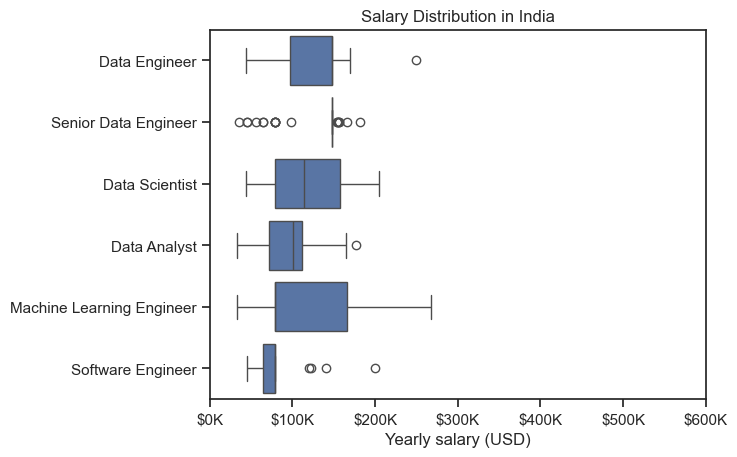

In [19]:
sns.boxplot(data = sd_in_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

plt.title('Salary Distribution in India')
plt.xlabel('Yearly salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [21]:
sd_DA_in = sd[(sd['job_title_short']== 'Data Analyst') & (sd['job_country'] == 'India')] .copy()
sd_DA_in = sd_DA_in.dropna(subset = ['salary_year_avg'])

In [22]:
sd_DA_in = sd_DA_in.explode('job_skills')
sd_DA_in[['salary_year_avg', 'job_skills']].head(5)


,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel


In [27]:
sd_DA_top = sd_DA_in.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median', ascending=False)
sd_DA_top = sd_DA_top.head(10)

In [31]:
sd_DA_skills = sd_DA_in.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending=False)
sd_DA_skills = sd_DA_skills.head(10).sort_values(by= 'median', ascending=False)
sd_DA_skills

,count,median
job_skills,,
power bi,17,111175.0
spark,11,111175.0
tableau,20,108087.5
excel,39,98500.0
sql,46,96050.0
python,36,96050.0
azure,15,93600.0
r,18,79200.0
aws,12,79200.0


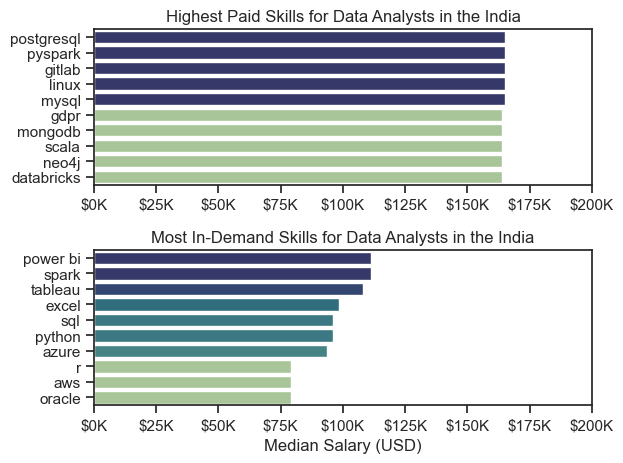

In [38]:
fig, ax = plt.subplots(2, 1)  


sns.barplot(data=sd_DA_top, x='median', y=sd_DA_top.index, hue='median', ax=ax[0], palette='crest')
ax[0].legend().remove() 
ax[0].set_title('Highest Paid Skills for Data Analysts in the India')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].set_xlim(0, 200000)
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.barplot(data=sd_DA_skills, x='median', y=sd_DA_skills.index, hue='median', ax=ax[1], palette='crest')
ax[1].legend().remove()
ax[1].set_title('Most In-Demand Skills for Data Analysts in the India')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim()) 
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()